# Project: Wrangling and Analyze Data


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

## 1- Gathering Data

In the cell below, we will gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

#### A- The WeRateDogs Twitter archive

In [2]:
df_t_archive = pd.read_csv("c:/twitter-archive-enhanced.csv")
df_t_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### B- The Tweet Image Predictions

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
image_request = requests.get(url)
with open('image_predictions.tsv',mode = 'wb') as file:
    file.write(image_request.content)

In [4]:
df_t_pred = pd.read_csv('image_predictions.tsv', sep = '\t')
df_t_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### C- Additional data from the Twitter API

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
import time
import datetime


# twitter setup
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting the access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object by passing in auth information
api = tweepy.API(auth) 

In [6]:
# Query how many tweets exist in our Twitter Archive DataFrame
t_id = df_t_archive.tweet_id.values
len(t_id)

2356

In [7]:
from timeit import default_timer as timer

counter = 0
# Store all the failed tweet IDs in the t_fails Dictionary
t_fails= {}
start = timer()

#creat a new tweet_json text file to store all the retreived tweet IDs
with open("tweet_json.txt", mode = "w") as outfile:
    for tweet_id in t_id:
        counter += 1
        print(str(counter)+ ": "+ str(tweet_id))
        # Error-Handling to query all the info related to the Tweet ID and indicate it as "Success" if the info was queried successfully
        try:
            tweet = api.get_status(tweet_id, tweet_mode = "extended")
            print("Sucess")
            # This is used to display the data in a form of a Key:Value pairs
            json.dump(tweet._json, outfile)
            outfile.write("\n")
            # If Tweet ID and other info were failed to be queried, they will be stored in the t_fails Dictionary and a message "fail" will be displayed
        except tweepy.TweepError as e:
            print("Fail")
            t_fails[tweet_id] = e
            pass
end = timer()
print(end - start)
print(t_fails)

1: 892420643555336193
Sucess
2: 892177421306343426
Sucess
3: 891815181378084864
Sucess
4: 891689557279858688
Sucess
5: 891327558926688256
Sucess
6: 891087950875897856
Sucess
7: 890971913173991426
Sucess
8: 890729181411237888
Sucess
9: 890609185150312448
Sucess
10: 890240255349198849
Sucess
11: 890006608113172480
Sucess
12: 889880896479866881
Sucess
13: 889665388333682689
Sucess
14: 889638837579907072
Sucess
15: 889531135344209921
Sucess
16: 889278841981685760
Sucess
17: 888917238123831296
Sucess
18: 888804989199671297
Sucess
19: 888554962724278272
Sucess
20: 888202515573088257
Fail
21: 888078434458587136
Sucess
22: 887705289381826560
Sucess
23: 887517139158093824
Sucess
24: 887473957103951883
Sucess
25: 887343217045368832
Sucess
26: 887101392804085760
Sucess
27: 886983233522544640
Sucess
28: 886736880519319552
Sucess
29: 886680336477933568
Sucess
30: 886366144734445568
Sucess
31: 886267009285017600
Sucess
32: 886258384151887873
Sucess
33: 886054160059072513
Sucess
34: 88598480001994752

Sucess
270: 841320156043304961
Sucess
271: 841314665196081154
Sucess
272: 841077006473256960
Sucess
273: 840761248237133825
Sucess
274: 840728873075638272
Sucess
275: 840698636975636481
Sucess
276: 840696689258311684
Sucess
277: 840632337062862849
Sucess
278: 840370681858686976
Sucess
279: 840268004936019968
Sucess
280: 839990271299457024
Sucess
281: 839549326359670784
Sucess
282: 839290600511926273
Sucess
283: 839239871831150596
Sucess
284: 838952994649550848
Sucess
285: 838921590096166913
Sucess
286: 838916489579200512
Sucess
287: 838831947270979586
Sucess
288: 838561493054533637
Sucess
289: 838476387338051585
Sucess
290: 838201503651401729
Sucess
291: 838150277551247360
Sucess
292: 838085839343206401
Sucess
293: 838083903487373313
Sucess
294: 837820167694528512
Sucess
295: 837482249356513284
Sucess
296: 837471256429613056
Sucess
297: 837366284874571778
Fail
298: 837110210464448512
Sucess
299: 837012587749474308
Fail
300: 836989968035819520
Sucess
301: 836753516572119041
Sucess
302: 

Sucess
535: 807106840509214720
Sucess
536: 807059379405148160
Sucess
537: 807010152071229440
Sucess
538: 806629075125202948
Sucess
539: 806620845233815552
Sucess
540: 806576416489959424
Sucess
541: 806542213899489280
Sucess
542: 806242860592926720
Sucess
543: 806219024703037440
Sucess
544: 805958939288408065
Sucess
545: 805932879469572096
Sucess
546: 805826884734976000
Sucess
547: 805823200554876929
Sucess
548: 805520635690676224
Sucess
549: 805487436403003392
Sucess
550: 805207613751304193
Sucess
551: 804738756058218496
Sucess
552: 804475857670639616
Sucess
553: 804413760345620481
Sucess
554: 804026241225523202
Sucess
555: 803773340896923648
Sucess
556: 803692223237865472
Sucess
557: 803638050916102144
Sucess
558: 803380650405482500
Sucess
559: 803321560782307329
Sucess
560: 803276597545603072
Sucess
561: 802952499103731712
Sucess
562: 802624713319034886
Sucess
563: 802600418706604034
Sucess
564: 802572683846291456
Sucess
565: 802323869084381190
Sucess
566: 802265048156610565
Sucess
5

Sucess
800: 772826264096874500
Sucess
801: 772615324260794368
Sucess
802: 772581559778025472
Sucess
803: 772193107915964416
Sucess
804: 772152991789019136
Sucess
805: 772117678702071809
Sucess
806: 772114945936949249
Sucess
807: 772102971039580160
Sucess
808: 771908950375665664
Sucess
809: 771770456517009408
Sucess
810: 771500966810099713
Sucess
811: 771380798096281600
Sucess
812: 771171053431250945
Sucess
813: 771136648247640064
Sucess
814: 771102124360998913
Sucess
815: 771014301343748096
Sucess
816: 771004394259247104
Fail
817: 770787852854652928
Sucess
818: 770772759874076672
Sucess
819: 770743923962707968
Fail
820: 770655142660169732
Sucess
821: 770414278348247044
Sucess
822: 770293558247038976
Sucess
823: 770093767776997377
Sucess
824: 770069151037685760
Sucess
825: 769940425801170949
Sucess
826: 769695466921623552
Sucess
827: 769335591808995329
Sucess
828: 769212283578875904
Sucess
829: 768970937022709760
Sucess
830: 768909767477751808
Sucess
831: 768855141948723200
Sucess
832: 

Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078: 739544079319588864
Fail
1079: 739485634323156992
Fail
1080: 739238157791694849
Fail
1081: 738891149612572673
Fail
1082: 738885046782832640
Fail
1083: 738883359779196928
Fail
1084: 738537504001953792
Fail
1085: 738402415918125056
Fail
1086: 738184450748633089
Fail
1087: 738166403467907072
Fail
1088: 738156290900254721
Fail
1089: 737826014890496000
Fail
1090: 737800304142471168
Fail
1091: 737678689543020544
Fail
1092: 737445876994609152
Fail
1093: 737322739594330112
Fail
1094: 737310737551491075
Fail
1095: 736736130620620800
Fail
1096: 736392552031657984
Fail
1097: 736365877722001409
Fail
1098: 736225175608430592
Fail
1099: 736010884653420544
Fail
1100: 735991953473572864
Fail
1101: 735648611367784448
Fail
1102: 735635087207878657
Fail
1103: 735274964362878976
Fail
1104: 735256018284875776
Fail
1105: 735137028879360001
Fail
1106: 734912297295085568
Fail
1107:

Fail
1348: 704364645503647744
Fail
1349: 704347321748819968
Fail
1350: 704134088924532736
Fail
1351: 704113298707505153
Fail
1352: 704054845121142784
Fail
1353: 703774238772166656
Fail
1354: 703769065844768768
Fail
1355: 703631701117943808
Fail
1356: 703611486317502464
Fail
1357: 703425003149250560
Fail
1358: 703407252292673536
Fail
1359: 703382836347330562
Fail
1360: 703356393781329922
Fail
1361: 703268521220972544
Fail
1362: 703079050210877440
Fail
1363: 703041949650034688
Fail
1364: 702932127499816960
Fail
1365: 702899151802126337
Fail
1366: 702684942141153280
Fail
1367: 702671118226825216
Fail
1368: 702598099714314240
Fail
1369: 702539513671897089
Fail
1370: 702332542343577600
Fail
1371: 702321140488925184
Fail
1372: 702276748847800320
Fail
1373: 702217446468493312
Fail
1374: 701981390485725185
Fail
1375: 701952816642965504
Fail
1376: 701889187134500865
Fail
1377: 701805642395348998
Fail
1378: 701601587219795968
Fail
1379: 701570477911896070
Fail
1380: 701545186879471618
Fail
1381:

Fail
1622: 684926975086034944
Fail
1623: 684914660081053696
Fail
1624: 684902183876321280
Fail
1625: 684880619965411328
Fail
1626: 684830982659280897
Fail
1627: 684800227459624960
Fail
1628: 684594889858887680
Fail
1629: 684588130326986752
Fail
1630: 684567543613382656
Fail
1631: 684538444857667585
Fail
1632: 684481074559381504
Fail
1633: 684460069371654144
Sucess
1634: 684241637099323392
Sucess
1635: 684225744407494656
Sucess
1636: 684222868335505415
Sucess
1637: 684200372118904832
Sucess
1638: 684195085588783105
Sucess
1639: 684188786104872960
Sucess
1640: 684177701129875456
Sucess
1641: 684147889187209216
Sucess
1642: 684122891630342144
Sucess
1643: 684097758874210310
Sucess
1644: 683857920510050305
Sucess
1645: 683852578183077888
Sucess
1646: 683849932751646720
Sucess
1647: 683834909291606017
Sucess
1648: 683828599284170753
Sucess
1649: 683773439333797890
Sucess
1650: 683742671509258241
Sucess
1651: 683515932363329536
Sucess
1652: 683498322573824003
Sucess
1653: 683481228088049664


Sucess
1879: 675047298674663426
Sucess
1880: 675015141583413248
Sucess
1881: 675006312288268288
Sucess
1882: 675003128568291329
Sucess
1883: 674999807681908736
Sucess
1884: 674805413498527744
Sucess
1885: 674800520222154752
Sucess
1886: 674793399141146624
Sucess
1887: 674790488185167872
Sucess
1888: 674788554665512960
Sucess
1889: 674781762103414784
Sucess
1890: 674774481756377088
Sucess
1891: 674767892831932416
Sucess
1892: 674764817387900928
Sucess
1893: 674754018082705410
Sucess
1894: 674752233200820224
Sucess
1895: 674743008475090944
Sucess
1896: 674742531037511680
Sucess
1897: 674739953134403584
Sucess
1898: 674737130913071104
Sucess
1899: 674690135443775488
Sucess
1900: 674670581682434048
Sucess
1901: 674664755118911488
Sucess
1902: 674646392044941312
Sucess
1903: 674644256330530816
Sucess
1904: 674638615994089473
Sucess
1905: 674632714662858753
Sucess
1906: 674606911342424069
Sucess
1907: 674468880899788800
Sucess
1908: 674447403907457024
Sucess
1909: 674436901579923456
Sucess
1

Sucess
2136: 670061506722140161
Sucess
2137: 670055038660800512
Sucess
2138: 670046952931721218
Sucess
2139: 670040295598354432
Sucess
2140: 670037189829525505
Sucess
2141: 670003130994700288
Sucess
2142: 669993076832759809
Sucess
2143: 669972011175813120
Sucess
2144: 669970042633789440
Sucess
2145: 669942763794931712
Sucess
2146: 669926384437997569
Sucess
2147: 669923323644657664
Sucess
2148: 669753178989142016
Sucess
2149: 669749430875258880
Sucess
2150: 669684865554620416
Sucess
2151: 669683899023405056
Sucess
2152: 669682095984410625
Sucess
2153: 669680153564442624
Sucess
2154: 669661792646373376
Sucess
2155: 669625907762618368
Sucess
2156: 669603084620980224
Sucess
2157: 669597912108789760
Sucess
2158: 669583744538451968
Sucess
2159: 669573570759163904
Sucess
2160: 669571471778410496
Sucess
2161: 669567591774625800
Sucess
2162: 669564461267722241
Sucess
2163: 669393256313184256
Sucess
2164: 669375718304980992
Sucess
2165: 669371483794317312
Sucess
2166: 669367896104181761
Sucess
2

In [9]:
# Out of the 2356 tweets, how many of them were failed to be queried?
print("The list of tweets no found" , len(t_fails))

The list of tweets no found 759


In [10]:
#convert the text file into a list where we will display the every tweet info in that list.
t_list = []
with open("tweet_json.txt") as file:
    for line in file:
        t_list.append(json.loads(line))

In [11]:
print(t_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [12]:
# from t_list, we are going to create a dataframe that has some info of the Tweets.
tweet_info = pd.DataFrame(t_list, columns = ["id", "retweet_count", "favorite_count"])
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,7173,34478
1,892177421306343426,5391,29909
2,891815181378084864,3552,22507
3,891689557279858688,7396,37722
4,891327558926688256,7932,36020


In [13]:
tweet_info = tweet_info.rename(columns = {'id':'tweet_id'})
tweet_info.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7173,34478


In [14]:
# Save the "tweet_info" dataframe as a CSV file 
tweet_info.to_csv("tweet_info.csv", index = False)

### 2- Assessing Data

#### A- Visual Assessment

In [15]:
df_t_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
df_t_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
tweet_info

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7173,34478
1,892177421306343426,5391,29909
2,891815181378084864,3552,22507
3,891689557279858688,7396,37722
4,891327558926688256,7932,36020
...,...,...,...
1592,666049248165822465,37,92
1593,666044226329800704,118,253
1594,666033412701032449,37,103
1595,666029285002620928,40,116


#### B- Programmatic Assessment

##### | Assessing The WeRateDogs Twitter Archive

In [18]:
df_t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
df_t_archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
               ... 
Patch             1
Brady             1
Dobby             1
Kulet             1
Alexanderson      1
Name: name, Length: 957, dtype: int64

In [20]:
df_t_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [21]:
df_t_archive[df_t_archive.rating_numerator<10].count()[0]

440

In [22]:
df_t_archive[df_t_archive.rating_numerator<10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [23]:
df_t_archive.loc[(df_t_archive.tweet_id==817502432452313088), 'rating_numerator']

462    7
Name: rating_numerator, dtype: int64

In [24]:
df_t_archive.loc[462, 'text']

"RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…"

In [25]:
df_t_archive[df_t_archive.rating_denominator != 10].count()[0]

23

##### || Assessing The Tweet Image Predictions

In [26]:
df_t_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df_t_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1976,870308999962521604,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,2,Greater_Swiss_Mountain_dog,0.622752,True,Appenzeller,0.158463,True,EntleBucher,0.148115,True
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False
1827,835297930240217089,https://pbs.twimg.com/media/C5eTCOVUsAAWhvc.jpg,1,Rottweiler,0.341276,True,Border_terrier,0.336220,True,Gordon_setter,0.045448,True
563,678021115718029313,https://pbs.twimg.com/media/CWjQm5gXAAA9GkD.jpg,1,miniature_pinscher,0.822048,True,Doberman,0.096085,True,Rottweiler,0.032709,True
264,670797304698376195,https://pbs.twimg.com/media/CU8mlhoVAAAteS5.jpg,1,Pembroke,0.472197,True,beagle,0.090938,True,German_shepherd,0.064366,True


In [28]:
sum(df_t_pred.jpg_url.duplicated())

66

##### ||| Assessing the Additional Data from the Twitter API

In [29]:
tweet_info.sample (10)

,tweet_id,retweet_count,favorite_count
1524,667200525029539841,236,560
1365,670374371102445568,247,683
1456,668542336805281792,187,408
628,793135492858580992,2414,6226
920,682047327939461121,872,3020
194,853299958564483072,3244,14465
1116,675113801096802304,706,1781
51,882045870035918850,4167,26275
957,680221482581123072,274,1403
1047,676936541936185344,4559,11878


In [30]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1597 non-null   int64
 1   retweet_count   1597 non-null   int64
 2   favorite_count  1597 non-null   int64
dtypes: int64(3)
memory usage: 37.6 KB


#### Assessment: Tidiness 

1) Dog Stage is seperated into 4 columns

2) Data in all 3 dataframe are related but they are seperated

#### Assessment: Quality
Completeness, validity, accuracy, consistency (content issues)

**| The WeRateDogs Twitter Archive:**
  1) Invalid "tweet_id" data type (int instead of string or object)
  
  2) Invalid "timestamp" data type (object instead of datetime)
  
  3) Invalid "name" for the some dogs (a, an, None, etc..)
  
  4) The "Source" column is in an HTML format. 
  
  5) Delete the columns that will not be necessary for further analysis.
  

**|| The Tweet Image Predictions:**

6) Some columns has attributes seperated by underscore instead of a space

7) Drop 66 jpg_url duplicated

8) Some p values come with upercase letter and other start with lowercase

### 3- Cleaning Data

#### A- Copying the Data into New Dataframes

In [31]:
t_archive_clean = df_t_archive.copy()
image_prediction_clean = df_t_pred.copy()
tweet_data_clean = tweet_info.copy()

**| Cleaning Tidiness Issues:**

1) Dog Stage is seperated into 4 columns

**Define**

I will merge all the 4 columns into one column

**Code**

In [32]:
'''
t_archive_clean['dog_stage'] = t_archive_clean[t_archive_clean.columns[7:11]].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1
)

# Set null vales as NaNs.
t_archive_clean['dog_stage'] = t_archive_clean['dog_stage'].apply(
    lambda x: np.nan if x is '' else x
)
'''
t_archive_clean['dog_stage'] = t_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
t_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [33]:
# Drop the 4 Dog Stages columns
t_archive_clean = t_archive_clean.drop(columns=["doggo","floofer","pupper","puppo"])

**Test**

In [34]:
t_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [35]:
t_archive_clean.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

2) Data in all 3 dataframes are related but they are seperated

**Define**

Merge all the 3 dataframes to one dataframe based on tweet_id

**Code**

In [36]:
t_archive_clean = pd.merge(t_archive_clean, tweet_data_clean, on="tweet_id", how="left")

In [37]:
t_archive_clean = pd.merge(t_archive_clean ,image_prediction_clean, on="tweet_id", how="left")

**Test**

In [38]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

**|| Cleaning Quality Issues:**

1) Invalid "tweet_id" data type (int instead of string or object)

**Define**

Converting "tweet_id" column data type from int to string

**Code**

In [39]:
t_archive_clean.tweet_id = t_archive_clean.tweet_id.astype(str)

**Test**

In [40]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

2) Invalid "timestamp" data type (object instead of datetime)

**Define**

Converting "timestamp" column data type from object to datetime

**Code**

In [41]:
t_archive_clean.timestamp = pd.to_datetime(t_archive_clean.timestamp)

**Test**

In [42]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

3) Invalid "name" for the some dogs (a, an, None, etc..)

**Define**

convert the invalid name to NaN and then extract the correct names from the "text" column; after the (named) word

**Code**

In [43]:
import re
t_archive_clean.name = t_archive_clean.name.replace(regex = ['^[a-z]+','None'], value = np.nan)

In [44]:
#Check the number of null values in the "name" column
sum(t_archive_clean.name.isnull())

854

In [45]:
#This function is to extract the name of the "text" column, and reutrn NaN if there is not any name provided
def extract(text):
    tweet_txt = text.split()
    for word in tweet_txt:
        if word.lower() == "named":
            name_index = tweet_txt.index(word) + 1
            return tweet_txt[name_index]
        else:
            pass
    return np.nan

In [46]:
t_archive_clean.name = np.where(t_archive_clean.name.isnull(), t_archive_clean.text.apply(extract), t_archive_clean.name)

**Test**

In [47]:
#sum Null values were filled out by some names
sum(t_archive_clean.name.isnull())

830

4) The "Source" column is in an HTML format. 

**Define**

Replace the HTML format to Text format

**Code**

In [48]:
t_archive_clean["source"] = t_archive_clean["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

<ipython-input-48-0afcc20dda9a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  t_archive_clean["source"] = t_archive_clean["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


**Test**

In [49]:
t_archive_clean["source"].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

5) Delete the columns that will not be necessary for further analysis

**Define**

Delete the (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

**Code**

In [50]:
t_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                      'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

**Test**

In [51]:
t_archive_clean.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,7173.0,34478.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,5391.0,29909.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,3552.0,22507.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,7396.0,37722.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,7932.0,36020.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


6) Some columns has attributes seperated by underscore instead of a space

**Define**

Replace the underscores with spaces

**Code**

In [52]:
t_archive_clean.p1 = t_archive_clean.p1.str.replace("_"," ")
t_archive_clean.p2 = t_archive_clean.p2.str.replace("_"," ")
t_archive_clean.p3 = t_archive_clean.p3.str.replace("_"," ")

**Test**

In [53]:
t_archive_clean.p1.head(10)

0                      orange
1                   Chihuahua
2                   Chihuahua
3                 paper towel
4                      basset
5    Chesapeake Bay retriever
6                 Appenzeller
7                  Pomeranian
8               Irish terrier
9                    Pembroke
Name: p1, dtype: object

In [54]:
t_archive_clean.p2.head(10)

0                 bagel
1              Pekinese
2              malamute
3    Labrador retriever
4      English springer
5         Irish terrier
6         Border collie
7            Eskimo dog
8          Irish setter
9              Cardigan
Name: p2, dtype: object

In [55]:
t_archive_clean.p3.head(10)

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
5                Indian elephant
6                      ice lolly
7                       Pembroke
8       Chesapeake Bay retriever
9                      Chihuahua
Name: p3, dtype: object

7) Drop 66 jpg_url duplicated

**Define**

I will drop the 66 duplicated jpg urls

**Code**

In [56]:
t_archive_clean = t_archive_clean.drop_duplicates(subset=['jpg_url'], keep='last')

**Test**

In [57]:
sum(t_archive_clean['jpg_url'].duplicated())

0

8) Some p values come with upercase letter and other start with lowercase

**Define**

Convert the Uppercase letters to Lowercase

**Code**

In [58]:
t_archive_clean.p1 = t_archive_clean.p1.str.title()
t_archive_clean.p2 = t_archive_clean.p1.str.title()
t_archive_clean.p3 = t_archive_clean.p1.str.title()

**Test**

In [59]:
t_archive_clean.p1.head(10)

0                      Orange
1                   Chihuahua
2                   Chihuahua
3                 Paper Towel
4                      Basset
5    Chesapeake Bay Retriever
6                 Appenzeller
7                  Pomeranian
8               Irish Terrier
9                    Pembroke
Name: p1, dtype: object

In [60]:
t_archive_clean.p2.head(10)

0                      Orange
1                   Chihuahua
2                   Chihuahua
3                 Paper Towel
4                      Basset
5    Chesapeake Bay Retriever
6                 Appenzeller
7                  Pomeranian
8               Irish Terrier
9                    Pembroke
Name: p2, dtype: object

In [61]:
t_archive_clean.p3.head(10)

0                      Orange
1                   Chihuahua
2                   Chihuahua
3                 Paper Towel
4                      Basset
5    Chesapeake Bay Retriever
6                 Appenzeller
7                  Pomeranian
8               Irish Terrier
9                    Pembroke
Name: p3, dtype: object

### 4- Storing Data

In [62]:
t_archive_clean.to_csv("twitter_archive_master.csv")

### 5- Analyzing and Visualizing Data

**1- The relationship between the "retweet count" and "favorite count"**

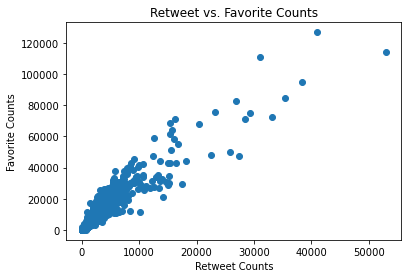

In [65]:
plt.scatter(t_archive_clean.retweet_count, t_archive_clean.favorite_count)
plt.title("Retweet vs. Favorite Counts")
plt.xlabel("Retweet Counts")
plt.ylabel("Favorite Counts");

There is a Linear relationship between the Retweet & Favorite counts (Positive Correlation)

**2- Most Source used to Tweet**

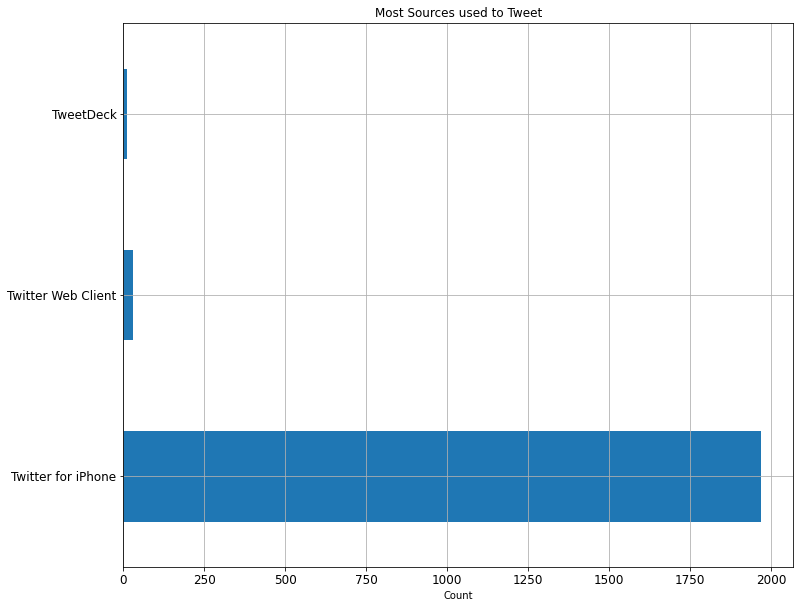

In [67]:
source_plt = t_archive_clean['source'].value_counts()
source_plt.plot(kind='barh', figsize=(12,10),grid=True, fontsize =12,title = 'Most Sources used to Tweet').set_xlabel('Count')
plt.show();

It apears that iPhone has the highest use rate among other sources

**3- The Percentage of the Dog Stages**

In [69]:
dog_perc = t_archive_clean.dog_stage.value_counts()
dog_perc

pupper     226
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

(-1.113328864871343,
 1.1006347091974023,
 -1.1259258726393113,
 1.1090866569808953)

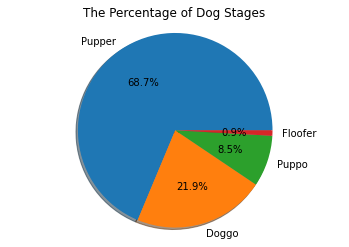

In [75]:
plt.pie(dog_perc, labels = ["Pupper","Doggo","Puppo","Floofer"], autopct = '%1.1f%%', shadow=True)
plt.title("The Percentage of Dog Stages")
plt.axis('equal')

From the Pie Chart, Pupper has the highest percentage, where Floofer has the lowest

**4- What are the Top 10 Popular Dogs on WeRateDogs?**

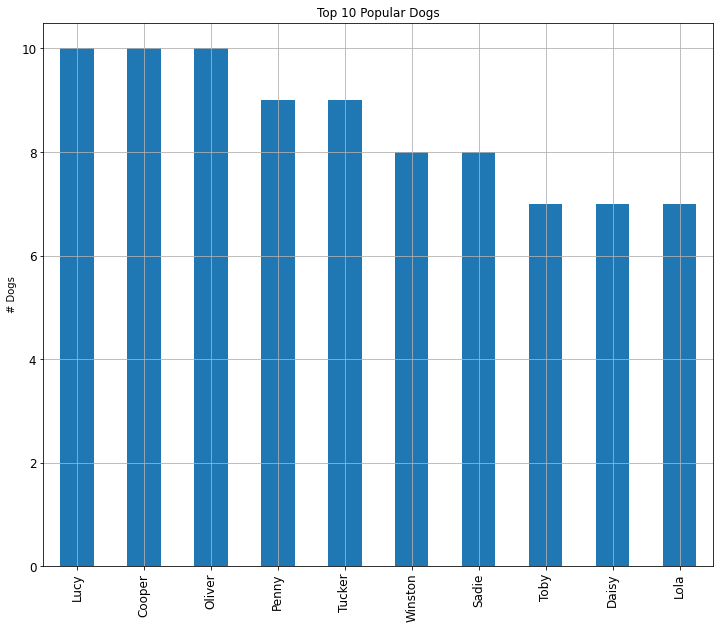

In [81]:
popular = t_archive_clean.name.value_counts()[1:11]
popular.plot(kind='bar', figsize=(12,10),grid=True, fontsize =12, title = 'Top 10 Popular Dogs').set_ylabel('# Dogs')
plt.show();